In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from io import BytesIO, StringIO
import nltk

In [2]:
with open("train_subset_toxicity.csv", 'rb') as f:
    rawdata = f.read()

In [3]:
str_rawdata = str(rawdata, 'utf-8', errors='replace')
text_df = pd.read_csv(StringIO(str_rawdata))
text_df.head()

,clean_title,clean_comment,url,avg_score,toxicity
0,shashi tharoor set to run for congress preside...,extremely valid points but i believe he has th...,/r/india/comments/xif8wm/shashi_tharoor_set_to...,-1.0,0.00
1,yogi government puts kolkata s image as part o...,even if the ad was designed by the newspaper t...,/r/india/comments/pmn9o3/yogi_government_puts_...,-1.0,0.00
2,an attempt to address the list of simplified e...,diverse population including muslims welcoming...,/r/india/comments/ebdeup/an_attempt_to_address...,-1.0,0.00
3,you guys noticing what s happening in sri lanka,what a joke they didn t create any propaganda...,/r/india/comments/tt1ryh/you_guys_noticing_wha...,0.0,0.00
4,just got abused on the train by a hyper nation...,ohoo bahut bura laga ye sunke ki aap undergarm...,/r/india/comments/rh2kcs/just_got_abused_on_th...,-2.0,0.66


In [12]:
text_df.describe()

,avg_score,toxicity
count,3000.000000,3000.000000
mean,-0.043000,0.206687
std,0.951202,0.325896
min,-2.000000,0.000000
25%,-1.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.500000
max,2.000000,1.000000


## Inter annotator agreement

In [61]:
def inter_annotator_agreement(judge1, judeg2):
    def prob_chance(label):
        j1_chance = ([judge_1[i]==label for i in range(3000)].count(True)) / 3000.0
        j2_chance = ([judge_2[i]==label for i in range(3000)].count(True)) / 3000.0
        p_e = j1_chance * j2_chance
        return p_e
    
    p_a = ( [abs( judge_1[i]-judge_2[i] ) <= 1 for i in range(3000)].count(True) ) / 3000.0
    p_e = sum(prob_chance(label) for label in [-2, -1, 0, 1, 2])
    kappa = (p_a - p_e) / (1 - p_e)
    print(f"agreement: {p_a:.3f}; by-chance: {p_e:.3f}; kappa score: {kappa:.3f}")

judge_1 = text_df['label1'].to_numpy()
judge_2 = text_df['label2'].to_numpy()

inter_annotator_agreement(judge_1, judge_2)

agreement: 0.971; by-chance: 0.314; kappa score: 0.958


In [45]:
def sentiment(score):
    if score < 0: return -1
    if score > 0: return 1
    return 0

judge_1 = list(map(sentiment, text_df['label1'].to_numpy()))
judge_2 = list(map(sentiment, text_df['label2'].to_numpy()))

# from sklearn.metrics import cohen_kappa_score
# score = cohen_kappa_score(judge_1, judge_2)
# print(score)

p_a = ([judge_1[i]==judge_2[i] for i in range(3000)].count(True)) / 3000.0
p_a


0.816

## Text Cleaning
 - Remove all quotes of previous comments (starts with ">" and ends with newline)
 - Remove special characters other than ,.'"?!
 - Remove links

In [6]:
def clean_quotations(text):
    temp = re.sub(r'>.*?\n', '', text)
    return temp

In [7]:
# clean_punc = re.compile('[^a-zA-Z0-9\s]')
# print(clean_punc.sub('', reviews[0]["text"][0].lower()))

In [8]:
text_df['comment'][3]

">The blockade was done by your own people.\n\nWhat a joke. \n\n>The simple truth is that your communist party aligned with China and created propaganda against India.\n\nThey didn't create any propaganda. India helped their civil war. They are puppet of India. Majority of them have no courage to talk anything about India. \n\nPeople in India die due to Koshi that's why India wants to construct another larger dam so that only Nepali would die.\n\nAnd another simple explanation, when India initiated a road in Lipulekh Kalapani area (which according to Sugauli treaty) is part of Nepal. India never talked about it with Nepal. Because India dissolved the treaty without Nepal's agreement. \n\nWhen every argument ends, we have common culture is your ultimate sword."

In [9]:
clean_quotations(text_df['comment'][3])

"\nWhat a joke. \n\n\nThey didn't create any propaganda. India helped their civil war. They are puppet of India. Majority of them have no courage to talk anything about India. \n\nPeople in India die due to Koshi that's why India wants to construct another larger dam so that only Nepali would die.\n\nAnd another simple explanation, when India initiated a road in Lipulekh Kalapani area (which according to Sugauli treaty) is part of Nepal. India never talked about it with Nepal. Because India dissolved the treaty without Nepal's agreement. \n\nWhen every argument ends, we have common culture is your ultimate sword."

In [10]:
def clean_url(text):
    temp = re.sub(r'(http(s)?:\/\/.)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+\.~#?&\/=]*)', '', text)
    return temp

In [ ]:
def clean_special_chars(text):
    temp = re.sub(r'[^a-zA-Z0-9\s\.,?!\'\"]', ' ', text)
    return temp

In [ ]:
def lowercase(text):
    temp = text.lower()
    return temp

In [11]:
def clean_text(text):
    temp = clean_quotations(text)
    temp = clean_url(temp)
    temp = 
    temp = re.sub(r'\s+', ' ', temp)  # replace multiple spaces with single space
    return temp.strip()

In [12]:
clean_text(text_df['comment'][3])

"What a joke. They didn't create any propaganda. India helped their civil war. They are puppet of India. Majority of them have no courage to talk anything about India. People in India die due to Koshi that's why India wants to construct another larger dam so that only Nepali would die. And another simple explanation, when India initiated a road in Lipulekh Kalapani area which according to Sugauli treaty is part of Nepal. India never talked about it with Nepal. Because India dissolved the treaty without Nepal's agreement. When every argument ends, we have common culture is your ultimate sword."

In [13]:
print(text_df['comment'][14])

Attempt at more elaborate translation, for those who might be interested:

> They are plastering one movie's posters all over the place.
> 
> The whole of BJP cadre is involved in plastering such posters.
> 
> This is why you came in poltics? To plaster... what will you tell you children at home when they ask what do you do for living? - *I plaster movie's posters.*
> 
> They are saying that Kashmir Files should be tax free, why not just upload it on Youtube? It'll be all free free.
> 
> Why are you getting it tax free? Just ask Vivek Agnihotri to put it all on Youtube, it will all be free for everybody to watch.
> 
> I read something in the newspaper yesterday - there's a Haryana BJP MLA who said that he will get a free screening of the movie held in some park - immediately, Vivek posted on twitter addressing Manohar Lal Khattar about this free screening and asking him to tell that MLA to pay for that screening. 
> 
> Listen, some guys are earning crores out of Kashmiri Pandits' trage

In [14]:
clean_text(text_df['comment'][14])

'Attempt at more elaborate translation, for those who might be interested Edit Full video here'

In [15]:
clean_df = pd.DataFrame()
clean_df['clean_title'] = text_df.apply(lambda x: clean_text(x['submission_title']), axis=1)
clean_df['clean_comment'] = text_df.apply(lambda x: clean_text(x['comment']), axis=1)
clean_df[['url', 'avg_score']] = text_df[['url', 'avg_score']]
clean_df.head()

,clean_title,clean_comment,url,avg_score
0,Shashi Tharoor Set To Run For Congress Preside...,Extremely valid points but I believe he has th...,/r/india/comments/xif8wm/shashi_tharoor_set_to...,-1.0
1,Yogi government puts Kolkata's image as part o...,Even if the ad was designed by the newspaper t...,/r/india/comments/pmn9o3/yogi_government_puts_...,-1.0
2,"An attempt to address the list of ""simplified""...",Diverse population including Muslims. Welcomin...,/r/india/comments/ebdeup/an_attempt_to_address...,-1.5
3,You guys noticing what's happening in Sri Lanka?,What a joke. They didn't create any propaganda...,/r/india/comments/tt1ryh/you_guys_noticing_wha...,0.0
4,Just got abused on the train by a hyper nation...,Ohoo bahut bura laga ye sunke ki aap Undergarm...,/r/india/comments/rh2kcs/just_got_abused_on_th...,-2.0


In [4]:
clean_df.to_csv("cleaned_subset.csv", index=False)

In [3]:
clean_df = pd.read_csv("cleaned_subset.csv")
clean_df.head()

,clean_title,clean_comment,url,avg_score
0,Shashi Tharoor Set To Run For Congress Preside...,Extremely valid points but I believe he has th...,/r/india/comments/xif8wm/shashi_tharoor_set_to...,-1.0
1,Yogi government puts Kolkata's image as part o...,Even if the ad was designed by the newspaper t...,/r/india/comments/pmn9o3/yogi_government_puts_...,-1.0
2,"An attempt to address the list of ""simplified""...",Diverse population including Muslims. Welcomin...,/r/india/comments/ebdeup/an_attempt_to_address...,-1.5
3,You guys noticing what's happening in Sri Lanka?,What a joke. They didn't create any propaganda...,/r/india/comments/tt1ryh/you_guys_noticing_wha...,0.0
4,Just got abused on the train by a hyper nation...,Ohoo bahut bura laga ye sunke ki aap Undergarm...,/r/india/comments/rh2kcs/just_got_abused_on_th...,-2.0


## Models

### Rule Based Classifier

In [68]:
import re
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
right = """right wing, RW, authority, hierarchy, order, duty, tradition, reaction, nationalism, conservative, right-libertarian, \
neoconservative, imperialist, monarchist, fascist, reactionaries, traditionalist, traditional, death penalty, \
religion, Bhajpa, BJP, Shiv Sena, RSS, MNS, Sanatan, dharm, Hindutva, Islamophobia, Narendra, Modi, Amit, Shah, \
mandir, ram, valmiki, ramayan, Bharatiya, Janata, Democratic Alliance, NDA, AIADMK, Janta Dal, bhakt, CAA, NRC, hindu majority, \
hindu unity, hindu pride, nationalist, sangh, sanghi, yogi""".lower().split(', ')
left = """left wing, LW, leftists, freedom, equality, fraternity, rights, progress, reform, internationalism, anarchist, communist, socialist, \
democratic socialist, social democrat, left-libertarian, progressive, social, liberal, Congress, UPA, \
INC, Aam, aadmi, AAP, CPI, CPI(M), Welfare, Protectionism, Commies, Rahul, gandhi, indira, yatra, arvind, kejriwal, \
libby, libbies, sjw, libtard, hinduphobia, LGBTQ, masjid, pappu, christian, muslim, secular, minority, minorities, Shashi, Tharoor""".lower().split(', ')

In [69]:
# Define a function to clean the text
def clean(text):
    res_txt = []
    for line in text.split('\n'):
        if not line.startswith(">"): 
            res_txt.append(line.lower())
    text = "\n".join(res_txt)
    
    text = re.sub(r'(http(s)?:\/\/.)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+\.~#?&\/=]*)', ' ', text)
    text = re.sub('[^A-Za-z]+', ' ', text)
    
    return text

text_df['cleaned_comment'] = text_df['comment'].apply(clean)
text_df['cleaned_title'] = text_df['submission_title'].apply(clean)
text_df.head()

,submission_title,comment,comment_id,url,subreddit_id,label1,label2,avg_score,cleaned_comment,cleaned_title
0,Shashi Tharoor Set To Run For Congress Preside...,Extremely valid points but I believe he has th...,ip5g6vu,/r/india/comments/xif8wm/shashi_tharoor_set_to...,2qh1q,-1,-1,-1.0,extremely valid points but i believe he has th...,shashi tharoor set to run for congress preside...
1,Yogi government puts Kolkata's image as part o...,Even if the ad was designed by the newspaper -...,hcontm8,/r/india/comments/pmn9o3/yogi_government_puts_...,2qh1q,-1,-1,-1.0,even if the ad was designed by the newspaper t...,yogi government puts kolkata s image as part o...
2,"An attempt to address the list of ""simplified""...",Diverse population including Muslims. Welcomin...,fbhlv40,/r/india/comments/ebdeup/an_attempt_to_address...,2qh1q,-1,-2,-1.0,diverse population including muslims welcoming...,an attempt to address the list of simplified e...
3,You guys noticing what's happening in Sri Lanka?,>The blockade was done by your own people.\n\n...,i2yrud3,/r/india/comments/tt1ryh/you_guys_noticing_wha...,2qh1q,0,0,0.0,what a joke they didn t create any propaganda...,you guys noticing what s happening in sri lanka
4,Just got abused on the train by a hyper-nation...,Ohoo bahut bura laga ye sunke ki aap Undergarm...,hooi92k,/r/india/comments/rh2kcs/just_got_abused_on_th...,2qh1q,-2,-2,-2.0,ohoo bahut bura laga ye sunke ki aap undergarm...,just got abused on the train by a hyper nation...


In [93]:
# Word frequency for comment
from nltk import FreqDist
def word_count(lemmatized_text):
    words = lemmatized_text.split()
    temp=zip(*[words[i:] for i in range(0,2)])
    words.extend([' '.join(t) for t in temp])
    fdist = FreqDist(words)
    return fdist

# Calculate sentiment of word frequency comment
def sentiment_count(freq_dist):
    total = 0
    for term, freq in freq_dist.items():
        if term in left: 
            total -= freq
        if term in right: 
            total += freq
    return total

left = list(map(str.strip, left))
right = list(map(str.strip, right))
text_df['wordCount_comment'] = text_df['clean_comment'].apply(word_count)
text_df['wordCount_title'] = text_df['clean_title'].apply(word_count)
text_df['sentiment_comment'] = text_df['wordCount_comment'].apply(sentiment_count)
text_df['sentiment_title'] = text_df['wordCount_title'].apply(sentiment_count)

del text_df['wordCount_comment']
del text_df['wordCount_title']
text_df.head()

,clean_title,clean_comment,url,avg_score,toxicity,sentiment_comment,sentiment_title
0,shashi tharoor set to run for congress preside...,extremely valid points but i believe he has th...,/r/india/comments/xif8wm/shashi_tharoor_set_to...,-1.0,0.00,0,0
1,yogi government puts kolkata s image as part o...,even if the ad was designed by the newspaper t...,/r/india/comments/pmn9o3/yogi_government_puts_...,-1.0,0.00,0,0
2,an attempt to address the list of simplified e...,diverse population including muslims welcoming...,/r/india/comments/ebdeup/an_attempt_to_address...,-1.0,0.00,0,0
3,you guys noticing what s happening in sri lanka,what a joke they didn t create any propaganda...,/r/india/comments/tt1ryh/you_guys_noticing_wha...,0.0,0.00,0,0
4,just got abused on the train by a hyper nation...,ohoo bahut bura laga ye sunke ki aap undergarm...,/r/india/comments/rh2kcs/just_got_abused_on_th...,-2.0,0.66,0,0


In [98]:
from sklearn.metrics import classification_report

def label(avg_score):
    if avg_score < -0.25: return "Left"
    if avg_score > 0.25: return "Right"
    return "Neutral"

true_labels = text_df['avg_score'].apply(label)
pred_labels = text_df['sentiment_comment'].apply(label)

report = classification_report(true_labels, pred_labels)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1423
           1       0.53      1.00      0.69      1577

    accuracy                           0.53      3000
   macro avg       0.76      0.50      0.35      3000
weighted avg       0.75      0.53      0.36      3000



### Toxicity

In [6]:
import requests

base_api = "http://sentic.net/api/en/%s.py?text=%s"
polarity_key = "zfCm4Hq4p0lgOJNU"
absa_key = "xSK04b5TqYH2"
toxicity_key = "TLHqwt0xWpvVG"

# Calculate toxicity of comment
def toxicity(text):
    x = requests.get(base_api % (toxicity_key, text))
    try:
        raw_value = float(x.text.strip('%\n'))/100
        return raw_value
    except:
        print("Error")
    return 0

try:
    for i, row in text_df.iterrows():
        if np.isnan(row['toxicity']):
            row['toxicity'] = toxicity(row['clean_comment'])
            text_df.iloc[i] = row

    text_df.to_csv('train_subset_toxicity.csv', index=False)

except:
    print("Error")
    text_df.to_csv('train_subset_toxicity_incomplete.csv')

In [22]:
from sklearn.metrics import classification_report

def label(avg_score):
    if avg_score < -0.25: return "Left"
    if avg_score > 0.25: return "Right"
    return "Neutral"

def infer(sentiment_comment, sentiment_title, toxicity):
    if toxicity >= 0.5:
        if sentiment_comment!=0: sentiment_comment = -1 * sentiment_comment
        else: sentiment_comment = -1 * sentiment_title

    return label(sentiment_comment)

true_labels = text_df['avg_score'].apply(label)
pred_labels = text_df.apply(lambda x: infer(x['sentiment_comment'], x['sentiment_title'], x['toxicity']), axis=1)

report = classification_report(true_labels, pred_labels)
print(report)

              precision    recall  f1-score   support

        Left       0.32      0.29      0.30       773
     Neutral       0.67      0.67      0.67      1577
       Right       0.27      0.31      0.29       650

    accuracy                           0.49      3000
   macro avg       0.42      0.42      0.42      3000
weighted avg       0.49      0.49      0.49      3000



### Random Forest Classifier & SVC

In [63]:
def label(avg_score):
    if avg_score < -0.25: return "Left"
    if avg_score > 0.25: return "Right"
    return "Neutral"

In [64]:
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Split the data into input features (text and float) and labels
X = text_df[['clean_comment', 'toxicity']]
y = text_df['avg_score'].apply(label)

# Define the preprocessing steps for the text and float features
text_transformer = TfidfVectorizer(ngram_range=(3,7), analyzer='char_wb')

# Combine the preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, 'clean_comment')
    ], remainder='passthrough')

# Define the pipeline for the random forest classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', C=1))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=123)

# Train the classifier on the training data
pipeline.fit(X_train, y_train)

# Predict the labels on the test data
y_pred = pipeline.predict(X_test)

# Compute the precision, recall, and F1 score of the predictions
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

        Left       0.52      0.30      0.38       250
     Neutral       0.62      0.89      0.73       546
       Right       0.60      0.26      0.36       225

    accuracy                           0.61      1021
   macro avg       0.58      0.48      0.49      1021
weighted avg       0.59      0.61      0.56      1021



In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Split the data into input features (text and float) and labels
X = text_df[['clean_comment', 'toxicity']]
y = text_df['avg_score'].apply(label)

# Define the preprocessing steps for the text and float features
text_transformer = TfidfVectorizer(max_features=20_000, ngram_range=(3,7), analyzer='char_wb')

# Combine the preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, 'clean_comment')
    ], remainder='passthrough')

# Define the pipeline for the random forest classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=123)

# Train the classifier on the training data
pipeline.fit(X_train, y_train)

# Predict the labels on the test data
y_pred = pipeline.predict(X_test)

# Compute the precision, recall, and F1 score of the predictions
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

        Left       0.52      0.34      0.41       250
     Neutral       0.64      0.90      0.75       546
       Right       0.65      0.27      0.38       225

    accuracy                           0.62      1021
   macro avg       0.61      0.50      0.51      1021
weighted avg       0.62      0.62      0.59      1021



### XGBoost

In [66]:
def label(avg_score):
    if avg_score < -0.25: return 0
    if avg_score > 0.25: return 2
    return 1

In [67]:
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Split the data into input features (text and float) and labels
X = text_df[['clean_comment', 'toxicity']]
y = text_df['avg_score'].apply(label)

# Define the preprocessing steps for the text and float features
text_transformer = TfidfVectorizer(ngram_range=(3,7), analyzer='char_wb')

# Combine the preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, 'clean_comment')
    ])

# Define the pipeline for the random forest classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(learning_rate=0.05))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=123)

# Train the pipeline using GridSearchCV
pipeline.fit(X_train, y_train)

# Get the best pipeline and evaluate it on the test set
y_pred = pipeline.predict(X_test)

# Compute the precision, recall, and F1 score of the predictions
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.53      0.35      0.42       250
           1       0.64      0.89      0.74       546
           2       0.57      0.23      0.33       225

    accuracy                           0.61      1021
   macro avg       0.58      0.49      0.50      1021
weighted avg       0.60      0.61      0.57      1021



### Two Layer Prediction

In [31]:
right = """right wing, RW, authority, hierarchy, order, duty, tradition, reaction, nationalism, conservative, right-libertarian, \
neoconservative, imperialist, monarchist, fascist, reactionaries, traditionalist, traditional, death penalty, \
religion, Bhajpa, BJP, Shiv Sena, RSS, MNS, Sanatan, dharm, Hindutva, Islamophobia, Narendra, Modi, Amit, Shah, \
mandir, ram, valmiki, ramayan, Bharatiya, Janata, Democratic Alliance, NDA, AIADMK, Janta Dal, bhakt, CAA, NRC, hindu majority, \
hindu unity, hindu pride, nationalist, sangh, sanghi, yogi, brahmin, brahman, smriti irani, hindu rashtra, jai shri ram, \
pm cares, pmcares, adani, hindu""".lower()
left = """left wing, LW, leftists, freedom, equality, fraternity, rights, progress, reform, internationalism, anarchist, communist, socialist, \
democratic socialist, social democrat, left-libertarian, progressive, social, liberal, western, Congress, UPA, RG, mamata, \
Aam, aadmi, AAP, CPI, Welfare, Protectionism, Commies, Rahul, gandhi, indira, yatra, arvind, kejriwal, inclusivity, \
libby, libbies, sjw, libtard, hinduphobia, LGBTQ, masjid, pappu, christian, muslim, secular, minority, minorities, Shashi, Tharoor, \
gay, lesbian, transgender, trans, reservation, abrahamic""".lower()

right_terms = set(right.split(', '))
left_terms = set(left.split(', '))
len(right_terms), len(left_terms)

(62, 59)

In [105]:
# 3-class labels
# Left (0), Neutral (1), Right (2)
def label(avg_score):
    if avg_score < -0.25: return 0
    if avg_score > 0.25: return 2
    return 1

# Neutral (1) vs non-neutral (0)
def label1(label):
    if label in [0, 2]: return 0
    return 1

# Left (0) vs right (1)
def label2(label):
    if label == 2: return 1
    return 0

# Convert step 2 labels to 3-class predictions
def convLabel(label):
    if label==1: return 2
    return 0

def pass_through(x):
    return np.array(x).astype(int)

#### Additional Features

In [158]:
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

vader = SentimentIntensityAnalyzer()

def feature_extraction(clean_text, terms):
    clean_text = clean_text.lower()
    features = []
    for t in terms:
        features.append(len(re.findall(r'\b'+t, clean_text)))

    return sum(features)

def add_sentiment_features(clean_text):
    # appends sentiment scores onto extracted features
    temp = []
    temp.append(vader.polarity_scores(clean_text)['compound'])
    tb = TextBlob(clean_text)
    temp.append(tb.sentiment.polarity)
    temp.append(tb.sentiment.subjectivity)
    return temp[0]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [159]:
temp_df = text_df.copy()
temp_df['left_features'] = temp_df.apply(lambda x: feature_extraction(x['clean_comment'], left_terms), axis=1)
temp_df['right_features'] = temp_df.apply(lambda x: feature_extraction(x['clean_comment'], right_terms), axis=1)
temp_df['sentiment_features'] = temp_df.apply(lambda x: add_sentiment_features(x['clean_comment']), axis=1)
temp_df.head()

,clean_title,clean_comment,url,avg_score,toxicity,sentiment_comment,sentiment_title,left_features,right_features,sentiment_features
0,shashi tharoor set to run for congress preside...,extremely valid points but i believe he has th...,/r/india/comments/xif8wm/shashi_tharoor_set_to...,-1.0,0.00,0,0,1,0,0.5941
1,yogi government puts kolkata s image as part o...,even if the ad was designed by the newspaper t...,/r/india/comments/pmn9o3/yogi_government_puts_...,-1.0,0.00,0,0,0,0,-0.2960
2,an attempt to address the list of simplified e...,diverse population including muslims welcoming...,/r/india/comments/ebdeup/an_attempt_to_address...,-1.0,0.00,0,0,4,0,0.5719
3,you guys noticing what s happening in sri lanka,what a joke they didn t create any propaganda...,/r/india/comments/tt1ryh/you_guys_noticing_wha...,0.0,0.00,0,0,0,0,-0.9264
4,just got abused on the train by a hyper nation...,ohoo bahut bura laga ye sunke ki aap undergarm...,/r/india/comments/rh2kcs/just_got_abused_on_th...,-2.0,0.66,0,0,1,0,0.7595


#### 2 step model code

In [160]:
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X = temp_df[['clean_comment', 'toxicity', 'left_features', 'right_features', 'sentiment_features']]
y = temp_df['avg_score'].apply(label)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=123)

X_train_step1 = X_train.copy()
X_test_step1 = X_test.copy()
y_train_step1 = y_train.apply(label1)
y_test_step1 = y_test.apply(label1)

# Define the preprocessing steps for the text and float features
text_transformer = TfidfVectorizer(max_features=20_000, analyzer='char_wb', ngram_range=(3,7))

# Combine the preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, 'clean_comment'),
        ('num', StandardScaler(), ['left_features', 'right_features'])
    ], remainder='passthrough')

# Step 1: Predict neutral or non-neutral
pipeline_step1 = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', xgb.XGBClassifier(max_depth=4, learning_rate=0.05))
])
pipeline_step1.fit(X_train_step1, y_train_step1)

# Predictions of step 1
y_pred_step1 = pipeline_step1.predict(X_test_step1)

# Print the classification report for the 1st predictions
print(classification_report(y_test_step1, y_pred_step1, target_names=['Non-neutral', 'Neutral']))

              precision    recall  f1-score   support

 Non-neutral       0.69      0.67      0.68       475
     Neutral       0.72      0.74      0.73       546

    accuracy                           0.71      1021
   macro avg       0.71      0.71      0.71      1021
weighted avg       0.71      0.71      0.71      1021



In [162]:
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=42)

# Step 2: Predict left or right based on the output of step 1
X_train_step2 = X_train[y_train != 1]
X_train_step2 = X_train_step2[['clean_comment']]#, 'left_features', 'right_features']]
y_train_step2 = y_train[y_train != 1].apply(label2)
# X_train_step2, y_train_step2 = rus.fit_resample(X_train_step2, y_train_step2)

# Define the preprocessing steps for the text and float features
text_transformer = TfidfVectorizer(max_features=20_000, analyzer='char_wb', ngram_range=(3,7))

# Combine the preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, 'clean_comment')
        # ('num', StandardScaler(), ['left_features', 'right_features'])
    ], remainder='passthrough')

# Step 2: Predict left or right
pipeline_step2 = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', xgb.XGBClassifier(max_depth=10, learning_rate=0.05))
])
pipeline_step2.fit(X_train_step2, y_train_step2)

# Predictions of step 2
X_test_step2 = X_test[y_pred_step1 != 1]
X_test_step2 = X_test_step2[['clean_comment']]#, 'left_features', 'right_features']]
y_test_step2 = y_test[y_pred_step1 != 1]
y_pred_step2 = pipeline_step2.predict(X_test_step2)

# Combine the predictions of step 1 and step 2
y_pred_step2 = np.array(list(map(convLabel, y_pred_step2)))
y_pred = y_pred_step1.copy()
y_pred[y_pred_step1 != 1] = y_pred_step2

# Print the classification report for the combined predictions
print(classification_report(y_test, y_pred, target_names=['Left', 'Neutral', 'Right']))

              precision    recall  f1-score   support

        Left       0.45      0.56      0.50       250
     Neutral       0.72      0.74      0.73       546
       Right       0.53      0.36      0.42       225

    accuracy                           0.61      1021
   macro avg       0.57      0.55      0.55      1021
weighted avg       0.61      0.61      0.61      1021



### BERT-based classifier

In [38]:
import torch
from torch import nn
from transformers import BertTokenizer, BertModel

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

In [7]:
clean_df['target'] = clean_df['avg_score']/2
clean_df.head()

,clean_title,clean_comment,url,avg_score,target
0,Shashi Tharoor Set To Run For Congress Preside...,Extremely valid points but I believe he has th...,/r/india/comments/xif8wm/shashi_tharoor_set_to...,-1.0,-0.50
1,Yogi government puts Kolkata's image as part o...,Even if the ad was designed by the newspaper t...,/r/india/comments/pmn9o3/yogi_government_puts_...,-1.0,-0.50
2,"An attempt to address the list of ""simplified""...",Diverse population including Muslims. Welcomin...,/r/india/comments/ebdeup/an_attempt_to_address...,-1.5,-0.75
3,You guys noticing what's happening in Sri Lanka?,What a joke. They didn't create any propaganda...,/r/india/comments/tt1ryh/you_guys_noticing_wha...,0.0,0.00
4,Just got abused on the train by a hyper nation...,Ohoo bahut bura laga ye sunke ki aap Undergarm...,/r/india/comments/rh2kcs/just_got_abused_on_th...,-2.0,-1.00


In [8]:
tokenizer = BertTokenizer.from_pretrained("google/muril-base-cased")

In [45]:
tokenizer(clean_df['clean_comment'][0], padding='max_length', max_length = 512, truncation=True, return_tensors="pt")

{'input_ids': tensor([[   104,  96009,   1691,  38666,   6810,   1363,    148,   8994,   1157,
           1207,   1108,  19794,   4394,   1192,   1113,   6952,   1750,  16762,
          10743,   1341,   1121,   7783,   1108,   1936,  31551,  24418,  51325,
           4382,  60648,    121,   7154,    119,    148,   1678,   5526,   1725,
          44165,   6127,   2959, 183153, 159371,   1207,    172,  12521,   1109,
          49676,   2219,   2733,   9610,   1113,   9989,   1147,    121,    105,
              0,      0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,      0,
              

In [9]:
class MuRILbase(nn.Module):

    def __init__(self, dropout=0.2):

        super(MuRILbase, self).__init__()

        self.bert = BertModel.from_pretrained('google/muril-base-cased')
        self.dropout = nn.Dropout(dropout)
        self.l1 = nn.Linear(768, 200)
        self.l2 = nn.Linear(200, 1)
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()
        
        modules = [self.bert.embeddings, *self.bert.encoder.layer[:-3]]  # freeze all but last few
        for module in modules:
            for param in module.parameters():
                param.requires_grad = False

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        x = self.dropout(pooled_output)
        x = self.l1(x)
        x = self.relu(x)
        x = self.l2(x)
        x = self.tanh(x)

        return x

In [9]:
model = MuRILbase()
model.to(device)

Some weights of the model checkpoint at google/muril-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


MuRILbase(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(197285, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
 

In [15]:
# testing with a few inputs
criterion = nn.MSELoss()

temp_batch = list(clean_df['clean_comment'][0:3])
temp_targets = torch.tensor(list(clean_df['target'][0:3])).to(device)
temp = tokenizer(temp_batch, padding='max_length', max_length = 512, truncation=True, return_tensors="pt")
input_ids = temp['input_ids'].to(device)
attention_mask = temp['attention_mask'].to(device)
with torch.no_grad():
    preds = model(input_ids, attention_mask)
#     loss = criterion(preds, temp_targets)
    print(preds)
    print(preds.squeeze(1))
    print(temp_targets)
#     print(loss.item())
    loss = criterion(preds.squeeze(1), temp_targets)
    print(loss.item())

tensor([[-0.0133],
        [-0.0146],
        [-0.0140]], device='cuda:0')
tensor([-0.0133, -0.0146, -0.0140], device='cuda:0')
tensor([-0.5000, -0.5000, -0.7500], device='cuda:0')
0.3380824625492096
0.33807727694511414


In [17]:
def train_loop(model, train_df, num_epochs, batch_size, lr=0.001):
    criterion = nn.MSELoss().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    losses = []
    
    inputs = train_df.copy()
    for _ in range(num_epochs):
        inputs = inputs.sample(frac=1).reset_index(drop=True)  # shuffle order
        for i in range(int(np.ceil(len(inputs)/batch_size))):
            model.zero_grad()
            
            # getting inputs
            batch = list(inputs['clean_comment'][i:i+batch_size])
            targets = torch.tensor(list(inputs['target'][i:i+batch_size])).to(device)
            temp = tokenizer(batch, padding='max_length', max_length = 512, truncation=True, return_tensors="pt")
            input_ids, attention_mask = temp['input_ids'].to(device), temp['attention_mask'].to(device)
            
            # training model
            preds = model(input_ids, attention_mask).squeeze(1)
            batch_loss = criterion(preds, targets)
            batch_loss.backward()
            optimizer.step()
            
            losses.append(batch_loss.item())
            
            # excplicitly delete variables in cuda
            del batch, targets, temp, input_ids, attention_mask, preds, batch_loss
    return model, losses

In [18]:
model = MuRILbase().to(device)

Some weights of the model checkpoint at google/muril-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [20]:
# torch.cuda.empty_cache()
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |     906 MB |    2080 MB |  602567 MB |  601661 MB |
|       from large pool |     905 MB |    2077 MB |  602101 MB |  601195 MB |
|       from small pool |       1 MB |       4 MB |     466 MB |     465 MB |
|---------------------------------------------------------------------------|
| Active memory         |     906 MB |    2080 MB |  602567 MB |  601661 MB |
|       from large pool |     905 MB |    2077 MB |  602101 MB |

In [21]:
%%time
model, losses = train_loop(model, clean_df, num_epochs=5, batch_size=16)

Wall time: 16.9 s


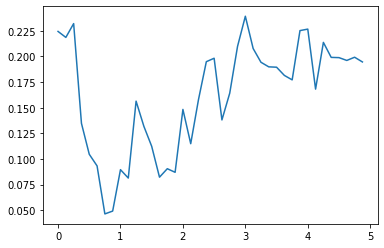

In [22]:
plt.plot([i*5/len(losses) for i in range(len(losses))], losses)